<a href="https://colab.research.google.com/github/K1nginthen0rth/IMV-web/blob/main/aps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [133]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [134]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [135]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

In [136]:
import pandas as pd
import matplotlib.pylab as plt
import yfinance as yf
import warnings
import matplotlib
import statsmodels.api as sm


In [137]:
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'


In [138]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
dados_series = yf.download("PETR4.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [140]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  16.190001  16.549999  16.190001  16.549999   8.335219   33461800
2018-01-03  16.490000  16.719999  16.370001  16.700001   8.410767   55940900
2018-01-04  16.780001  16.959999  16.620001  16.730000   8.425875   37064900
2018-01-05  16.700001  16.860001  16.570000  16.830000   8.476238   26958200
2018-01-08  16.740000  17.030001  16.709999  17.030001   8.576966   28400000
...               ...        ...        ...        ...        ...        ...
2022-08-25  34.099998  34.360001  32.669998  33.279999  33.279999   99511600
2022-08-26  33.279999  33.669998  32.570000  33.639999  33.639999   63545400
2022-08-29  33.549999  35.080002  33.450001  34.480000  34.480000   73339500
2022-08-30  34.000000  34.220001  32.270000  32.430000  32.430000   99361100
2022-08-31  32.070000  33.439999  31.820000  33.230000  33.230000  114235400

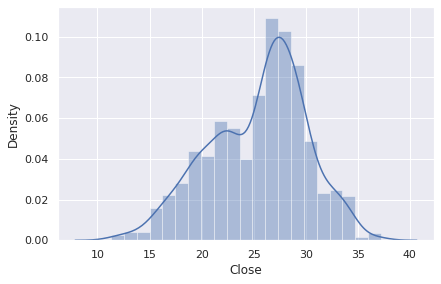

In [141]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [142]:
dados_series = yf.download("BCSA34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [143]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2019-11-01  15.93  15.93  15.93  15.93  14.313076     100
2019-11-04  15.93  15.93  15.93  15.93  14.313076       0
2019-11-05  15.93  15.93  15.93  15.93  14.313076       0
2019-11-06  15.93  15.93  15.93  15.93  14.313076       0
2019-11-07  15.93  15.93  15.93  15.93  14.313076       0
...           ...    ...    ...    ...        ...     ...
2022-08-25  12.59  12.59  12.37  12.47  12.212838   12688
2022-08-26  12.50  12.54  12.02  12.02  11.772119    8750
2022-08-29  12.09  12.19  12.06  12.12  11.870055    3786
2022-08-30  12.14  12.53  12.14  12.45  12.193250    4001
2022-08-31  12.45  12.70  12.45  12.70  12.438094    3416

[701 rows x 6 columns]


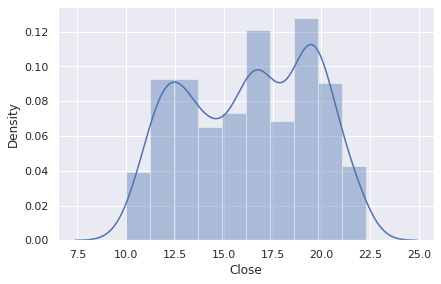

In [144]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [145]:
dados_series = yf.download("LMTB34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [146]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  1038.699951  1038.699951  1038.699951  1038.699951   902.420044   
2018-01-03  1038.699951  1038.699951  1038.699951  1038.699951   902.420044   
2018-01-04  1044.680054  1044.680054  1044.680054  1044.680054   907.615662   
2018-01-05  1044.680054  1044.680054  1044.680054  1044.680054   907.615662   
2018-01-08  1065.500000  1065.500000  1065.500000  1065.500000   925.703918   
...                 ...          ...          ...          ...          ...   
2022-08-25  2231.100098  2231.100098  2231.100098  2231.100098  2215.821533   
2022-08-26  2231.100098  2231.100098  2231.100098  2231.100098  2215.821533   
2022-08-29  2231.100098  2231.100098  2231.100098  2231.100098  2215.821533   
2022-08-30  2167.580078  2179.729980  2167.580078  2179.729980  2164.803223   
2022-08-31  2180.000000  2203.820068  2180.000000  2

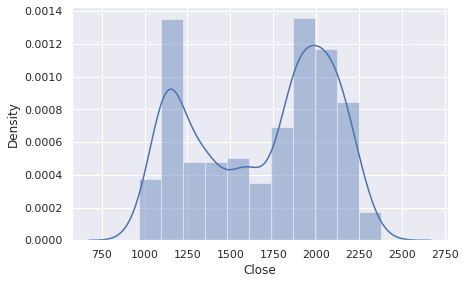

In [147]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [148]:
dados_series = yf.download("	GDBR34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [149]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02   661.500000   661.500000   661.500000   661.500000   585.523254   
2018-01-03   661.500000   661.500000   661.500000   661.500000   585.523254   
2018-01-04   661.900024   661.900024   661.900024   661.900024   585.877502   
2018-01-05   661.900024   661.900024   661.900024   661.900024   585.877502   
2018-01-08   661.900024   661.900024   661.900024   661.900024   585.877502   
...                 ...          ...          ...          ...          ...   
2022-08-25  1194.760010  1194.760010  1194.760010  1194.760010  1188.044556   
2022-08-26  1194.760010  1194.760010  1194.760010  1194.760010  1188.044556   
2022-08-29  1194.760010  1194.760010  1194.760010  1194.760010  1188.044556   
2022-08-30  1194.760010  1194.760010  1194.760010  1194.760010  1188.044556   
2022-08-31  1205.959961  1205.959961  1194.209961  1

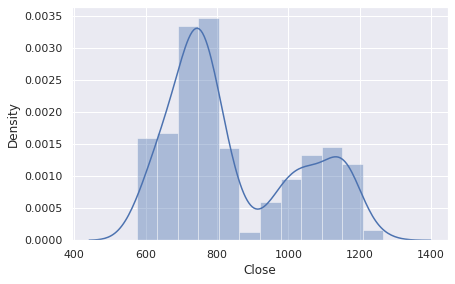

In [150]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [151]:
dados_series = yf.download("ATVI34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [152]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2019-07-11  173.949997  173.949997  173.949997  173.949997  170.877274     300
2019-07-12  173.949997  173.949997  173.949997  173.949997  170.877274       0
2019-07-15  173.949997  173.949997  173.949997  173.949997  170.877274       0
2019-07-16  173.949997  173.949997  173.949997  173.949997  170.877274       0
2019-07-17  173.949997  173.949997  173.949997  173.949997  170.877274       0
...                ...         ...         ...         ...         ...     ...
2022-08-25  405.250000  409.589996  400.000000  403.940002  403.940002      59
2022-08-26  405.079987  405.079987  398.649994  400.399994  400.399994      76
2022-08-29  398.000000  398.799988  396.119995  396.750000  396.750000      77
2022-08-30  396.750000  402.000000  396.750000  401.649994  401.649994      36
2022-08-31  404.500000  410.799988  404.500000  408.

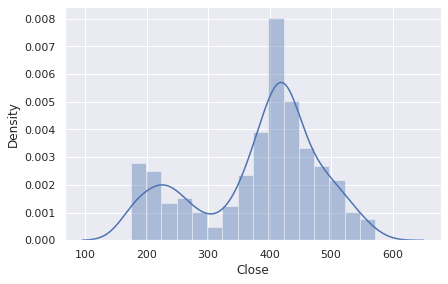

In [153]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [154]:
dados_series = yf.download("AAPL34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [155]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2018-01-02  14.202500  14.202500  14.075000  14.075000  13.400424    3600
2018-01-03  14.100000  14.145000  14.000000  14.062500  13.388523   39200
2018-01-04  14.000000  14.045000  14.000000  14.045000  13.371863   16000
2018-01-05  14.225000  14.225000  14.040000  14.200000  13.519434   54800
2018-01-08  14.200000  14.200000  14.092500  14.160000  13.481350   55600
...               ...        ...        ...        ...        ...     ...
2022-08-25  86.370003  87.529999  86.139999  86.620003  86.620003  142979
2022-08-26  86.980003  86.980003  83.040001  83.150002  83.150002  239429
2022-08-29  81.849998  82.370003  80.489998  81.180000  81.180000  113339
2022-08-30  81.779999  82.139999  80.239998  81.000000  81.000000  124885
2022-08-31  82.550003  83.320000  82.010002  82.300003  82.300003  155674

[1157 rows x 6 columns]


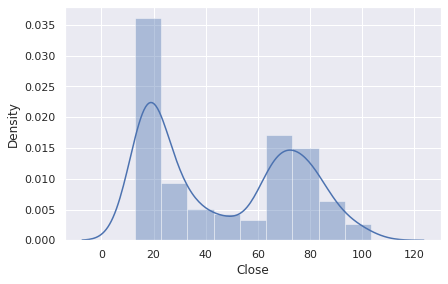

In [156]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [157]:
dados_series = yf.download("MSFT34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [158]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2018-01-02  11.666666  11.666666  11.666666  11.666666  11.012229   26400
2018-01-03  11.708333  11.875416  11.671666  11.671666  11.016948   26400
2018-01-04  11.766666  11.798750  11.766666  11.770833  11.110554   60000
2018-01-05  11.900000  11.900000  11.848750  11.848750  11.184099   43200
2018-01-08  11.933333  11.933333  11.918750  11.918750  11.250171   12000
...               ...        ...        ...        ...        ...     ...
2022-08-25  59.400002  59.459999  58.660000  59.230000  59.230000   98542
2022-08-26  59.230000  59.410000  56.820000  56.939999  56.939999  187086
2022-08-29  56.099998  56.430000  55.369999  55.720001  55.720001  182707
2022-08-30  55.549999  56.279999  55.180000  55.790001  55.790001  330747
2022-08-31  56.910000  57.639999  56.549999  56.549999  56.549999  315761

[1157 rows x 6 columns]


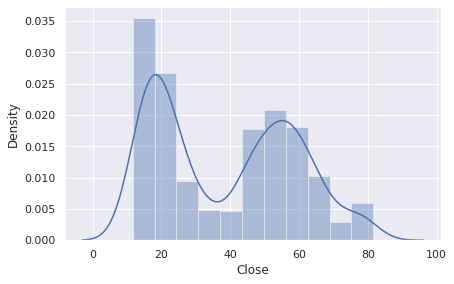

In [159]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [160]:
dados_series = yf.download("QCOM34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [161]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2018-01-02  17.866667  17.866667  17.866667  17.866667  15.729428       0
2018-01-03  17.791666  17.791666  17.791666  17.791666  15.663398    2400
2018-01-04  17.791666  17.791666  17.791666  17.791666  15.663398       0
2018-01-05  17.841665  17.841665  17.841665  17.841665  15.707418    1200
2018-01-08  17.950001  17.950001  17.950001  17.950001  15.802796    1200
...               ...        ...        ...        ...        ...     ...
2022-08-25  62.000000  62.200001  61.669998  62.200001  61.842888   24634
2022-08-26  61.000000  61.000000  59.299999  59.299999  58.959538      66
2022-08-29  58.099998  58.099998  57.200001  57.930000  57.597404     390
2022-08-30  57.840000  57.900002  56.000000  56.880001  56.553432     451
2022-08-31  57.389999  57.450001  57.099998  57.360001  57.360001   43211

[1157 rows x 6 columns]


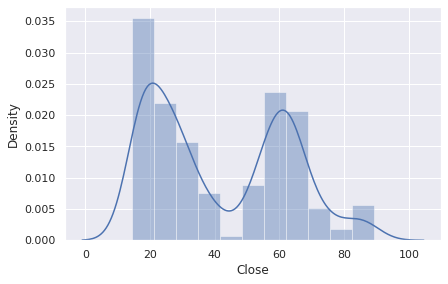

In [162]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [163]:
dados_series = yf.download("TWTR34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [164]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2018-01-02   40.200001   40.200001   40.200001   40.200001   40.200001       0
2018-01-03   40.200001   40.200001   40.200001   40.200001   40.200001       0
2018-01-04   38.500000   38.860001   38.500000   38.860001   38.860001     400
2018-01-05   39.599998   39.599998   39.599998   39.599998   39.599998    1000
2018-01-08   39.200001   39.270000   39.200001   39.270000   39.270000     400
...                ...         ...         ...         ...         ...     ...
2022-08-25  103.800003  105.849998  102.669998  105.500000  105.500000    6463
2022-08-26  103.110001  104.900002  102.290001  102.489998  102.489998    2393
2022-08-29  102.480003  102.489998  100.860001  101.199997  101.199997     759
2022-08-30  100.339996  101.000000   99.800003   99.800003   99.800003    3597
2022-08-31  102.220001  103.599998  101.209999  101.

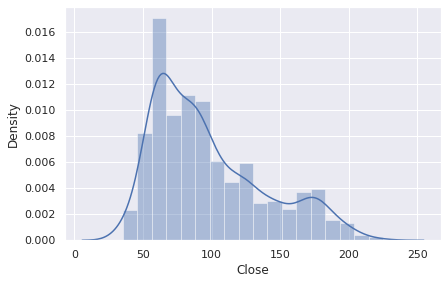

In [165]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [166]:
dados_series = yf.download("DISB34.SA", start="2018-01-01", end="2022-09-01")

[*********************100%***********************]  1 of 1 completed


In [167]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2018-01-02  24.133333  24.133333  24.057333  24.133333  23.481670   24000
2018-01-03  24.270000  24.336666  24.270000  24.336666  23.679514    9000
2018-01-04  24.100000  24.142666  24.100000  24.142666  23.490753    3000
2018-01-05  24.156666  24.156666  24.081333  24.081333  23.431078   18000
2018-01-08  23.766666  23.793333  23.766666  23.793333  23.150854   13500
...               ...        ...        ...        ...        ...     ...
2022-08-25  39.759998  40.160000  39.660000  39.799999  39.799999  100368
2022-08-26  39.790001  40.139999  38.529999  38.750000  38.750000   78176
2022-08-29  38.060001  38.450001  37.849998  38.160000  38.160000   46044
2022-08-30  38.240002  38.610001  37.849998  38.169998  38.169998   45373
2022-08-31  38.799999  39.380001  38.610001  39.380001  39.380001  163448

[1157 rows x 6 columns]


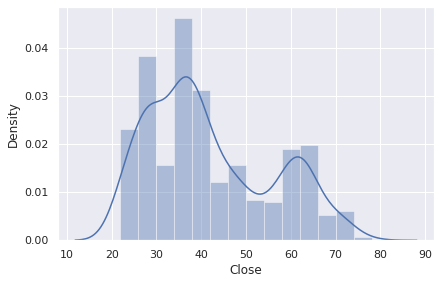

In [168]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.distplot(dados_series['Close'].dropna())

In [169]:
import plotly.io as pio
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'colab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [170]:
import plotly.offline as py
import plotly.graph_objs as go
dados_grafico = [go.Scatter(x=dados_series.index, y=dados_series['Close'])]
py.iplot(dados_grafico)